In [ ]:
# path_dir = '../datasets/transport/'
# for root, dirs, files in os.walk(path_dir):
#     for file in files:
#         for str in ['28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']:
#             if str in file:
#                 # Create the new filename
#                 new_filename = f'YG0{str}_{file}'
                
#                 # Rename the file
#                 source_path = os.path.join(root, file)
#                 destination_path = os.path.join(root, new_filename)
#                 os.rename(source_path, destination_path)
#                 print(f"Renamed: {source_path} -> {destination_path}")
# # write a code to copy all files in path_dir or subdirectories of path_dir to path_dir

# import os
# import shutil

# def copy_files_to_path_dir(path_dir):
#     for root, dirs, files in os.walk(path_dir):
#         for file in files:
#             source_path = os.path.join(root, file)
#             destination_path = os.path.join(path_dir, file)
#             shutil.copy(source_path, destination_path)
#             print(f"Copied: {source_path} -> {destination_path}")

#     # Replace 'path_dir' with the directory you want to copy files from and to.
# path_dir = '../datasets/transport/'
# copy_files_to_path_dir(path_dir)

In [7]:

# def load_rho_T(file_name, d, w, l):
#     e = 1.60217663e-19
#     df = pd.read_csv(file_name, sep='\s+')
#     T = df['T_sample_(K)']
#     rho = df['R_nv']* w * d / l
#     return T, rho

# def plot_rho_T(properties, w, l):
#     plt.figure(figsize=(12,8))
#     for prop in properties:
#         T, rho = load_rho_T(prop[0], prop[1], w, l)
#         plt.plot(T, rho*1e8, label=prop[2])
#     plt.xlabel('Temperature (K)')
#     plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
#     plt.legend()
#     plt.show()   
    
# def carrier_density(properties):
#     e = 1.60217663e-19

#     fig, axes = plt.subplots(1, len(properties), figsize=(16,4))
#     for i, prop in enumerate(properties):
#         df = pd.read_csv(prop[3], sep='\s+')
#         B = df['B_analog_(T)']
#         R = df['R_nv']

#         a, b = np.polyfit(B, R, 1)
#         R_fit = a*B+b
#         n = 1/(a*(-e)*prop[1])/1e6
#         n = np.round(n, 2)
        
#         axes[i].plot(B, R, label=prop[2])
#         axes[i].plot(B, R_fit, label='fitted:'+str(np.round(a, 4))+'*y'+str(np.round(b, 4)))
#         axes[i].legend()
#         axes[i].set_xlabel('Magnetic field (T)')
#         axes[i].set_ylabel('Resistivity (\u03BC\u03A9 cm)')
#         axes[i].set_title('carrier density: n ='+format(n,'.2e')+'/ cm^3')
#     plt.show()
#     return 

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/')
from electric_properties import Resistivity_temperature, hall_measurement

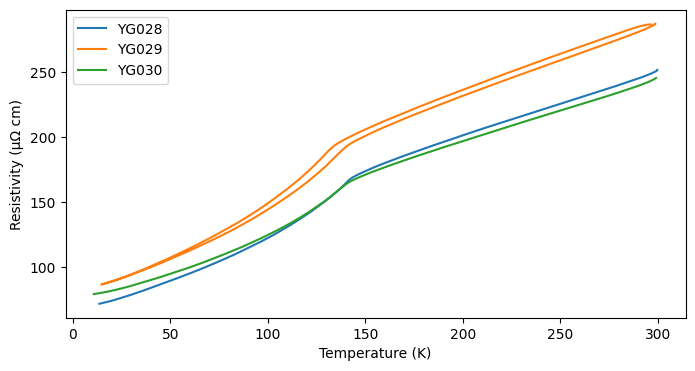

In [22]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 40*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_RT.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_RT.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT.dat']
R_list, T_list = [], []

for d, file in zip(d_list, files):
    func = Resistivity_temperature(file, printing=True)
    R, T = func.calculate_R_T(d=d, w=w, l=l)
    R_list.append(R)
    T_list.append(T)
func.plot_R_T(R_list, T_list, ['YG028', 'YG029', 'YG030'])

Hall coefficient: R_H =-5.96e-17cm^3/C
carrier density: n =-3.72e+02/ cm^3


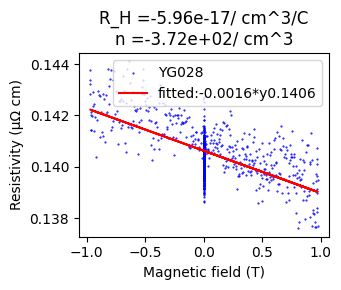

In [23]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall.dat', printing=True) 

R_fit, a, b, B, R = hall_func.fit_B_R()
R_H = hall_func.calculate_hall_coefficient(d)
n = hall_func.calculate_carrier_density(d)

hall_func.plot_carrier_density([R_H], [n], [B], [R], [R_fit], [a], [b], ['YG028'])

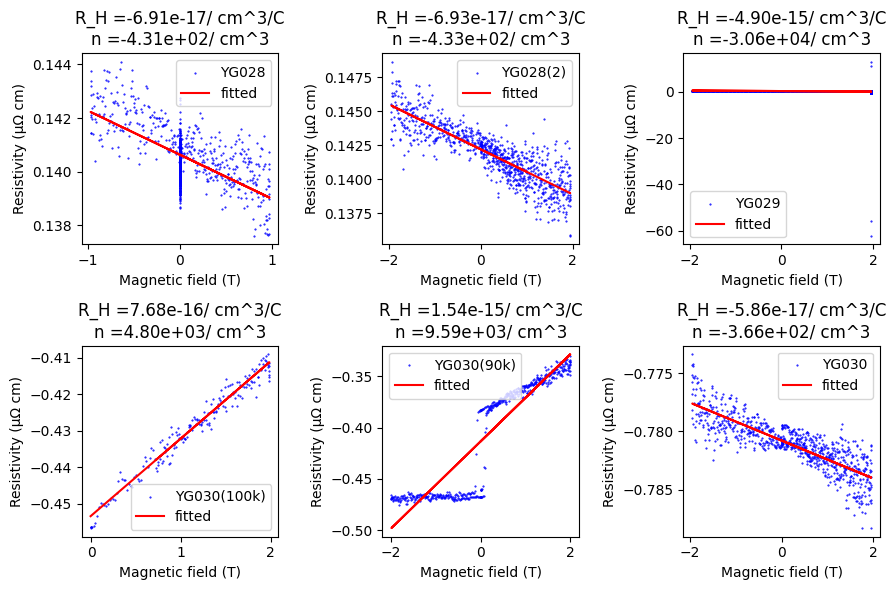

In [26]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall_2.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_100k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_90k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_Hall_2.dat']
labels = ['YG028', 'YG028(2)', 'YG029', 'YG030(100k)', 'YG030(90k)', 'YG030']
R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], [], []
for d, file in zip(d_list, files):

    hall_func = hall_measurement(file, printing=False)
    R_fit, a, b, B, R = hall_func.fit_B_R()
    R_H = hall_func.calculate_hall_coefficient(d)
    n = hall_func.calculate_carrier_density(d)

    R_H_list.append(R_H)   
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(R_H_list, n_list, B_list, R_list, R_fit_list, a_list, b_list, labels)

carrier density: n =1.05e+23/ cm^3


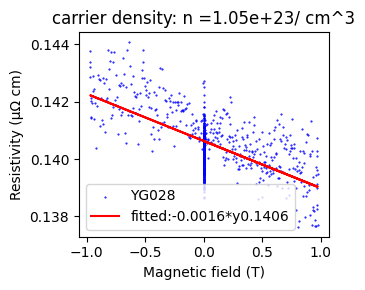

In [12]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall.dat', printing=True) 

n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG028'])

carrier density: n =1.04e+23/ cm^3


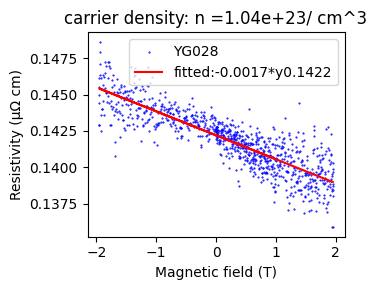

In [13]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall_2.dat', printing=True) 

n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG028'])

carrier density: n =1.41e+21/ cm^3
carrier density: n =-7.85e+22/ cm^3


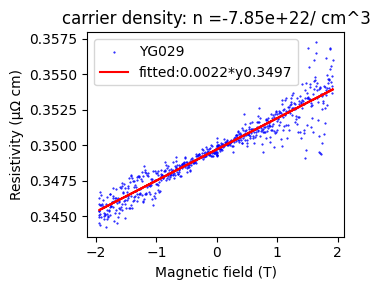

In [164]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall.dat', printing=True) 
n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
# remove outliers in df based on linear fit
hall_func.df = hall_func.df.drop(hall_func.df[(np.abs(R_fit-np.array(hall_func.df['R_nv']))>10*R_fit)].index)
n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG029'])

carrier density: n =8.43e+22/ cm^3


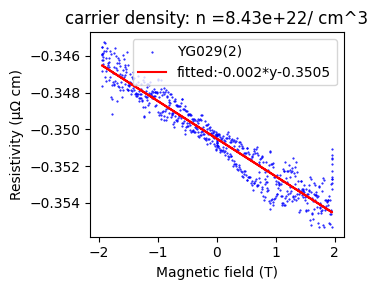

In [165]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall_2.dat', printing=True) 

n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG029(2)'])

carrier density: n =-4.06e+21/ cm^3


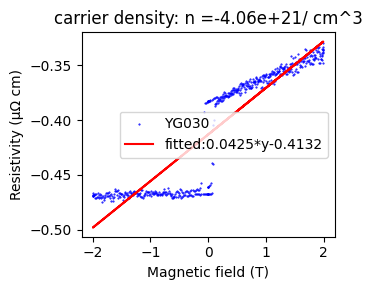

In [155]:
hall_func = hall_measurement('../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_90k.dat', printing=True) 

n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG030'])

carrier density: n =-5.75e+21/ cm^3


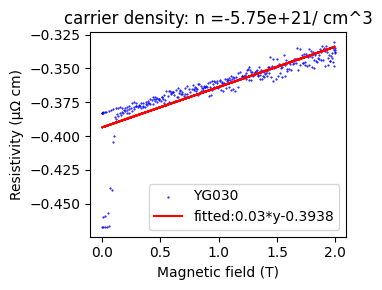

In [156]:
hall_func.df = hall_func.df.drop(hall_func.df[hall_func.df['B_analog_(T)']<0].index)
n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG030'])

In [157]:
hall_func.df

,B_digital_(T),B_analog_(T),I_s,V_nv,R_nv
4,0.056089,0.012613,0.0001,-0.000046,-0.460259
5,0.075279,0.032073,0.0001,-0.000046,-0.459512
6,0.094948,0.052243,0.0001,-0.000046,-0.456915
7,0.114606,0.072537,0.0001,-0.000044,-0.438767
8,0.134293,0.093332,0.0001,-0.000040,-0.404733
...,...,...,...,...,...
536,1.978140,1.933690,0.0001,-0.000035,-0.347586
537,1.994070,1.952960,0.0001,-0.000034,-0.344133
538,2.001260,1.969240,0.0001,-0.000034,-0.342091
539,2.001360,1.979820,0.0001,-0.000035,-0.345050


carrier density: n =-7.30e+21/ cm^3


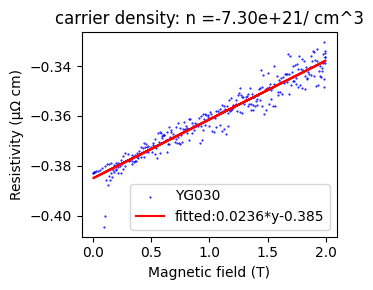

In [162]:
hall_func.df = hall_func.df.drop(hall_func.df[np.abs(R_fit-np.array(hall_func.df['R_nv']))>np.abs(0.1*R_fit)].index)
n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG030'])

In [ ]:

n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
hall_func.plot_carrier_density([n], [B], [R], [R_fit], [a], [b], ['YG030(pos)'])

carrier density: n =9.03e+22/ cm^3
carrier density: n =9.00e+22/ cm^3
carrier density: n =1.27e+21/ cm^3
carrier density: n =7.63e+22/ cm^3
carrier density: n =-8.12e+21/ cm^3
carrier density: n =-4.06e+21/ cm^3
carrier density: n =1.07e+23/ cm^3


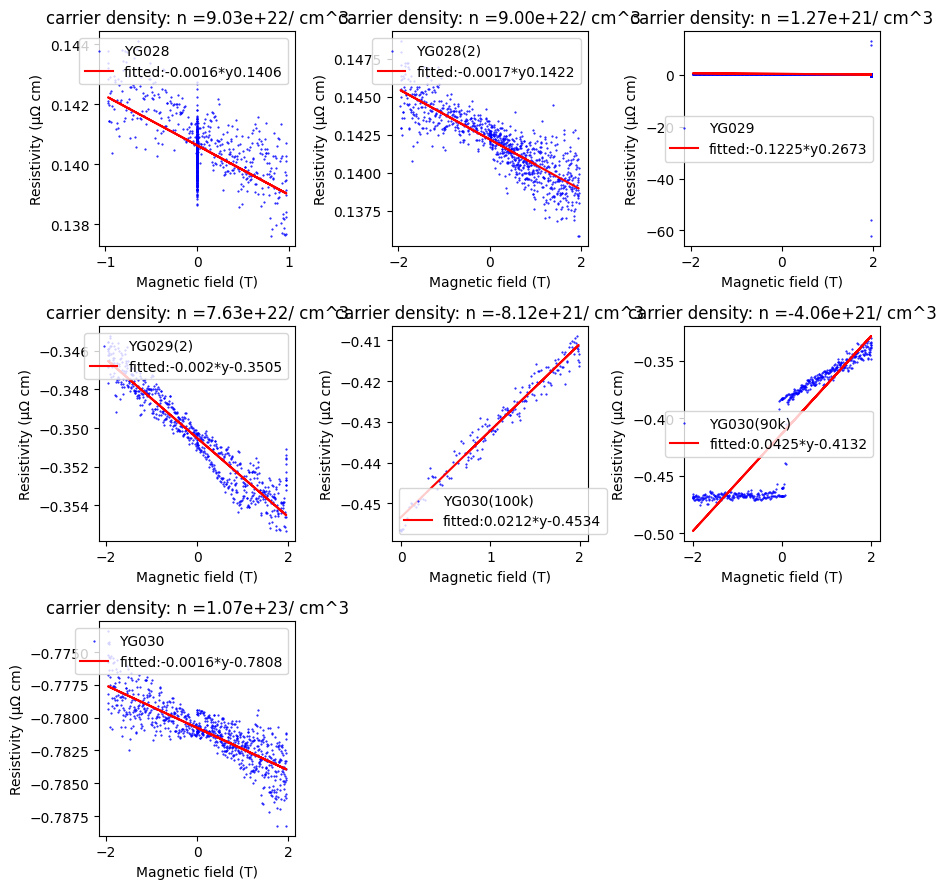

In [103]:
w, l = 20*1e-6, 95*1e-6
d_list = [42*1e-9, 42*1e-9, 40*1e-9, 40*1e-9, 36.2*1e-9, 36.2*1e-9, 36.2*1e-9]
files = ['../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG028_Yichen28_Hall_2.dat', 
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG029_Yichen29_Hall_2.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_100k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_RT_hall_90k.dat',
         '../datasets/plume_dynamic_SRO/set_1-YG028-030/electrical/YG030_Yichen30_Hall_2.dat']
labels = ['YG028', 'YG028(2)', 'YG029', 'YG029(2)', 'YG030(100k)', 'YG030(90k)', 'YG030']
n_list, B_list, R_list, R_fit_list, a_list, b_list = [], [], [], [], [], []
for d, file in zip(d_list, files):
    hall_func = hall_measurement(file, printing=True)
    n, B, R, R_fit, a, b = hall_func.calculate_carrier_density(d=d)
    n_list.append(n)
    B_list.append(B)
    R_list.append(R)
    R_fit_list.append(R_fit)
    a_list.append(a)
    b_list.append(b)

hall_func.plot_carrier_density(n_list, B_list, R_list, R_fit_list, a_list, b_list, labels)

In [25]:
properties = [
 ['./transport/28/220704Low-T_DCR/Yichen28_RT.dat', 42*1e-9, 'YG028', './transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat'],
 ['./transport/29/220705Low-T_DCR/Yichen29_RT.dat', 40*1e-9, 'YG029', './transport/29/220705Low-T_DCR/Yichen29_Hall_2.dat'],
 ['./transport/30/220706Low-T_DCR/Yichen30_RT.dat', 36.2*1e-9, 'YG030', './transport/30/220706Low-T_DCR/Yichen30_Hall_2.dat']
            ]
w, l = 20*1e-6, 95*1e-6, 
plot_rho_T(properties, w, l)
carrier_density(properties)

NameError: name 'plot_rho_T' is not defined

In [10]:
properties = [
     ['./transport/31/220727Low-T DCR/YG_31_RT_2.dat', 42*1e-9, 'YG031', 
      './transport/31/220727Low-T DCR/YG_31_Hall_2.dat'],
    
#      ['./transport/33/220908Low-T DCR/YG33_rt.dat', 42*1e-9, 'YG033', 
#       './transport/33/220908Low-T DCR/YG33_hall.dat'],  
    
     ['./transport/33/220908Low-T DCR/YG33_rt.dat', 42*1e-9, 'YG033(2)', 
      './transport/33/220908Low-T DCR/YG33_hall_2.dat'], 
    
     ['./transport/34/RT/220829Low-T DCR/XH829_RT_1.dat', 42*1e-9, 'YG034', 
      './transport/34/Hall/220829Low-T DCR/YG34_Hall.dat']
]
w, l = 20*1e-6, 95*1e-6, 
plot_rho_T(properties, w, l)
carrier_density(properties)

FileNotFoundError: [Errno 2] No such file or directory: './transport/31/220727Low-T DCR/YG_31_RT_2.dat'

<Figure size 1200x800 with 0 Axes>

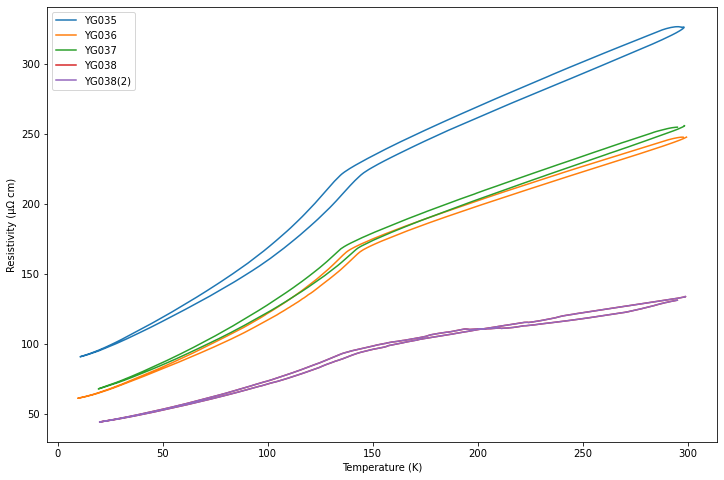

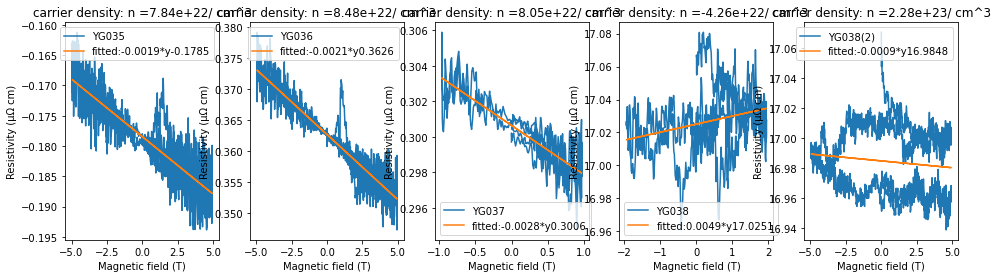

In [15]:
properties = [
     ['./transport/35/220803Low-T DCR/YG_35_RT_1.dat', 42*1e-9, 'YG035',
      './transport/35/220803Low-T DCR/YG_35_Hall_1.dat'],
     ['./transport/36/220731Low-T DCR/YG_36_RT_1.dat', 35*1e-9, 'YG036',
      './transport/36/220731Low-T DCR/YG_36_Hall_1.dat'],
     ['./transport/37/220902Low-T DCR/YG34_rt 2.dat', 28*1e-9, 'YG037',
      './transport/37/220902Low-T DCR/YG34_Hall.dat'],
     ['./transport/38/220907Low-T DCR/YG38_rt.dat', 30*1e-9, 'YG038',
      './transport/38/220907Low-T DCR/YG38_hall.dat'],
     ['./transport/38/220907Low-T DCR/YG38_rt.dat', 30*1e-9, 'YG038(2)',
      './transport/38/220908Low-T DCR/YG38_hall_2.dat']
]
w, l = 20*1e-6, 95*1e-6
plot_rho_T(properties, w, l)
carrier_density(properties)

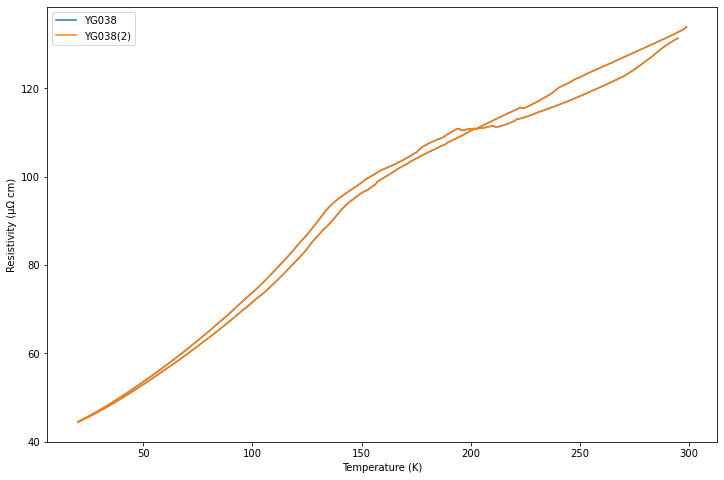

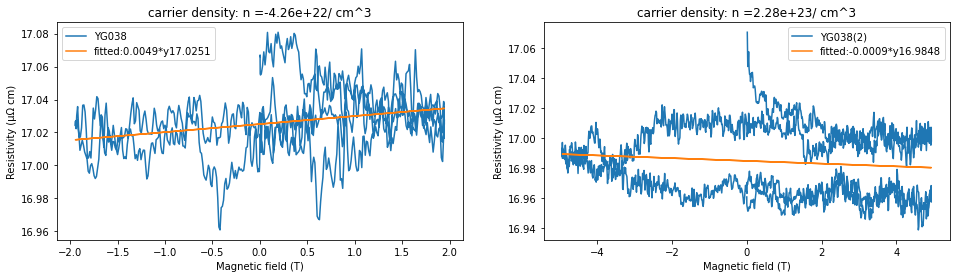

In [16]:
properties = [
     ['./transport/38/220907Low-T DCR/YG38_rt.dat', 30*1e-9, 'YG038',
      './transport/38/220907Low-T DCR/YG38_hall.dat'],
    
     ['./transport/38/220907Low-T DCR/YG38_rt.dat', 30*1e-9, 'YG038(2)',
      './transport/38/220908Low-T DCR/YG38_hall_2.dat']
]
w, l = 20*1e-6, 95*1e-6
plot_rho_T(properties, w, l)
carrier_density(properties)

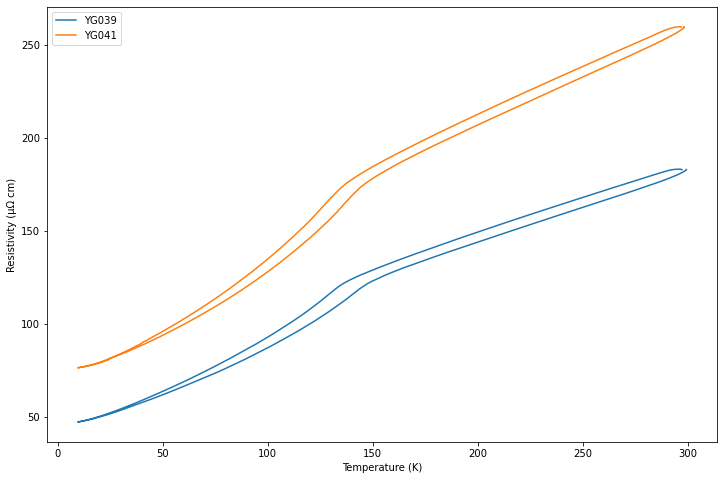

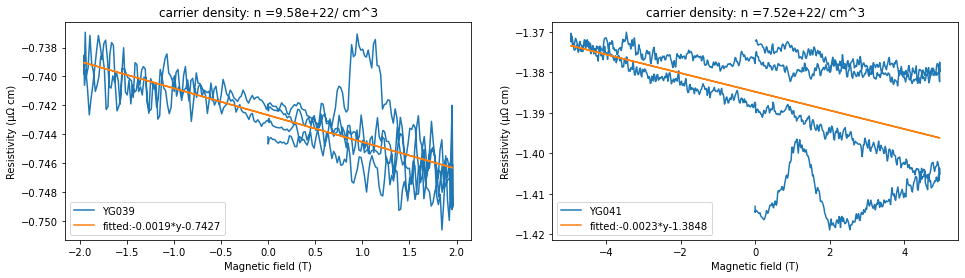

In [10]:
properties = [
     ['./transport/39/220728Low-T DCR/YC_39_RT_1.dat', 35*1e-9, 'YG039',
      './transport/39/220728Low-T DCR/YC_39_Hall_1.dat'],
     ['./transport/41/220801Low-T DCR/YG_41_RT_1.dat', 36*1e-9, 'YG041',
      './transport/41/220802Low-T DCR/YG_41_Hall_1.dat'],
            ]
w, l = 20*1e-6, 95*1e-6, 
plot_rho_T(properties, w, l)
carrier_density(properties)

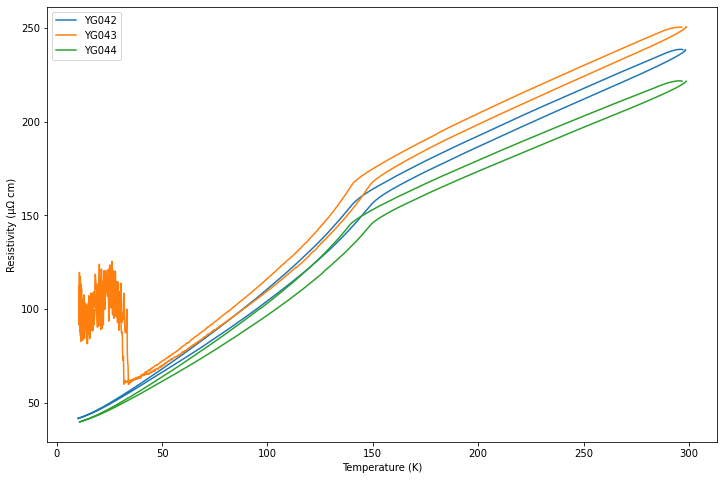

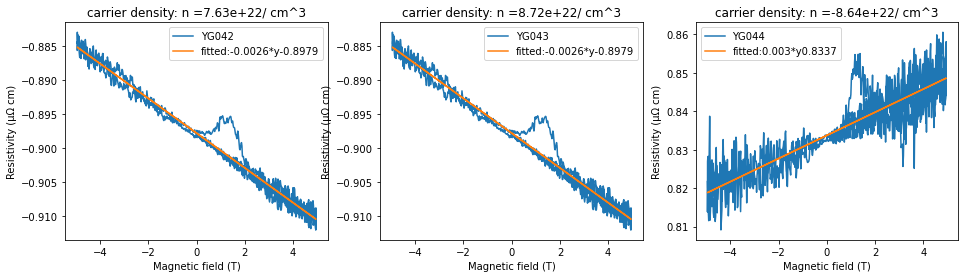

In [11]:
properties = [
     ['./transport/42/220801Low-T DCR/YG_42_RT_1.dat', 32*1e-9, 'YG042',
      './transport/42/220802Low-T DCR/YG_42_Hall_1.dat'],
    
     ['./transport/43/220803Low-T DCR/YG_43_RT_1.dat', 28*1e-9, 'YG043',
      './transport/42/220802Low-T DCR/YG_42_Hall_1.dat'], # not measured yet
    
     ['./transport/44/220802Low-T DCR/YG_44_RT_1.dat', 24*1e-9, 'YG044',
      './transport/44/220802Low-T DCR/YG_44_Hall_1.dat'],
            ]
w, l = 20*1e-6, 95*1e-6, 
plot_rho_T(properties, w, l)
carrier_density(properties)